# <font color='black'> HomeWork-6: Separate Neural Network for Actor and Critic
Netid: sbhamid2</font>

__Your goal this week is to implement PPO and apply it to the simple pendulum. The main reference for PPO is Schulman et al (2017).__

__You can think of PPO as a natural extension of REINFORCE (which you implemented in HW4 and HW5), where we are now using a deep net both to describe the policy (actor) and the value function (critic).__

__In particular, a key step will be to implement the loss function in Eq. (9) of Schulman et al (2017). The input to the deep net should be the continuous state (joint angle, joint velocity). The output from the deep net should be both the mean and variance of a normal distribution from which the continuous action (joint torque) is sampled - a so-called "Gaussian policy" - and the value of the state. You are free to drop the "entropy bonus" term from Eq. (9). Note that pytorch and tensorflow will compute the gradient of the loss function for you - there is no need to derive an expression for the gradient yourself, as you did in HW4 for the tabular policy.__

__Your implementation should be designed so that it can be used with arbitrary continuous-state/continuous-action gym environments. In particular, you should aspire to apply your same algorithm to the acrobot (where the deep net would output the mean and covariance of a multi-variate normal distribution as well as the value), once you have successfully applied it to the simple pendulum.__

__Follow the same pattern as with previous homework - choose hyperparameters so that the training converges, plot the learning rate__

In [1]:
import ppo_twonet as ppo
import gym 
import matplotlib.pyplot as plt
import numpy as np

env = gym.make('Pendulum-v0')
a_seed = 0
env.seed(a_seed)

set_params = {}

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [2]:
### Pendulum v1 version
set_params.update({'clip': 0.2, 'max_grad': 0.5, 'ppo_epoch': 10, 'mem_size': 1000, 'batch_size': 32, \
                   'gamma': 0.9, 'no_eps': 150, 'eps_len': 1000, 'env': env, 'lr': 1e-4})
pendulum_v1 = ppo.Agent(env)
rewards_v1 = pendulum_v1.train_model(set_params)

In [3]:
### Pendulum v5 version -> Changing memory size
set_params.update({'clip': 0.2, 'max_grad': 0.5, 'ppo_epoch': 10, 'mem_size': 500, 'batch_size': 32, \
                   'gamma': 0.9, 'no_eps': 150, 'eps_len': 1000, 'env': env, 'lr': 1e-4})
pendulum_v5 = ppo.Agent(env)
rewards_v5 = pendulum_v5.train_model(set_params)

In [4]:
### Pendulum v3 version-> Changing learning rate
set_params.update({'clip': 0.2, 'max_grad': 0.5, 'ppo_epoch': 10, 'mem_size': 1000, 'batch_size': 32, \
                   'gamma': 0.9, 'no_eps': 150, 'eps_len': 1000, 'env': env, 'lr': 1e-3})
pendulum_v3 = ppo.Agent(env)
rewards_v3 = pendulum_v3.train_model(set_params)

In [5]:
### Pendulum v4 version -> Changing batch size
set_params.update({'clip': 0.2, 'max_grad': 0.5, 'ppo_epoch': 10, 'mem_size': 1000, 'batch_size': 16, \
                   'gamma': 0.9, 'no_eps': 150, 'eps_len': 1000, 'env': env, 'lr': 1e-4})
pendulum_v4 = ppo.Agent(env)
rewards_v4 = pendulum_v4.train_model(set_params)

In [6]:
### Pendulum v2 version -> Changing episode length
set_params.update({'clip': 0.2, 'max_grad': 0.5, 'ppo_epoch': 10, 'mem_size': 1000, 'batch_size': 32, \
                   'gamma': 0.9, 'no_eps': 150, 'eps_len': 1500, 'env': env, 'lr': 1e-4})
pendulum_v2 = ppo.Agent(env)
rewards_v2 = pendulum_v2.train_model(set_params)

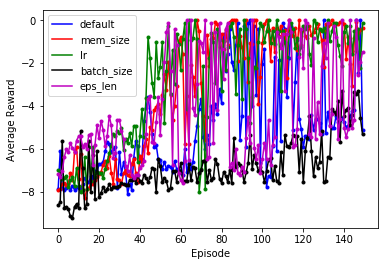

In [7]:
plt.plot(np.transpose(rewards_v1)[0], np.transpose(rewards_v1)[1]/(pendulum_v1.eps_len), 'b.')
plt.plot(np.transpose(rewards_v1)[0], np.transpose(rewards_v1)[1]/(pendulum_v1.eps_len), 'b', label='default')

plt.plot(np.transpose(rewards_v2)[0], np.transpose(rewards_v2)[1]/(pendulum_v2.eps_len), 'r.')
plt.plot(np.transpose(rewards_v2)[0], np.transpose(rewards_v2)[1]/(pendulum_v2.eps_len), 'r', label='mem_size')#

plt.plot(np.transpose(rewards_v3)[0], np.transpose(rewards_v3)[1]/(pendulum_v3.eps_len), 'g.')
plt.plot(np.transpose(rewards_v3)[0], np.transpose(rewards_v3)[1]/(pendulum_v3.eps_len), 'g', label='lr')

plt.plot(np.transpose(rewards_v4)[0], np.transpose(rewards_v4)[1]/(pendulum_v4.eps_len), 'k.')
plt.plot(np.transpose(rewards_v4)[0], np.transpose(rewards_v4)[1]/(pendulum_v4.eps_len), 'k', label='batch_size')

plt.plot(np.transpose(rewards_v5)[0], np.transpose(rewards_v5)[1]/(pendulum_v5.eps_len), 'm.')
plt.plot(np.transpose(rewards_v5)[0], np.transpose(rewards_v5)[1]/(pendulum_v5.eps_len), 'm', label='eps_len')

plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.legend()
plt.show()

Rewards attained:  -2.00461255518


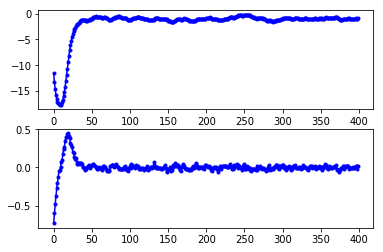

In [8]:
eps_len = 400
agent = pendulum_v3
record_pos, record_action, rewards = agent.test_model(eps_len)
print('Rewards attained: ', rewards)
plt.figure()
get_angle = np.arctan2(np.transpose(record_pos)[1], np.transpose(record_pos)[0])* 180 / np.pi
plt.subplot(211)
plt.plot(np.arange(eps_len), get_angle, 'b')
plt.plot(np.arange(eps_len), get_angle, 'b.')
plt.subplot(212)
plt.plot(np.arange(eps_len), np.transpose(record_pos)[2], 'b')
plt.plot(np.arange(eps_len), np.transpose(record_pos)[2], 'b.')
plt.show()